In [1]:
import pandas as pd
import numpy as np

In [37]:
comtrade_07_09 = pd.read_csv('comtrade_07_09.csv')
comtrade_10_14 = pd.read_csv('comtrade_10_14.csv')
comtrade_15_19 = pd.read_csv('comtrade_15_19.csv')

In [38]:
frames = [comtrade_15_19, comtrade_07_09 ,comtrade_10_14]
comtrade = pd.concat(frames)

In [39]:
comtrade.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,H5,2017,2017,2017,2,0,1,Import,8,Albania,...,0.0,NaN,NaN,NaN,0.0,NaN,208617396,NaN,NaN,0
1,H5,2017,2017,2017,2,0,1,Import,12,Algeria,...,0.0,NaN,NaN,NaN,0.0,NaN,1892866531,NaN,NaN,4
2,H5,2017,2017,2017,2,0,1,Import,20,Andorra,...,0.0,NaN,NaN,NaN,0.0,NaN,33846021,NaN,NaN,0
3,H5,2017,2017,2017,2,0,1,Import,36,Australia,...,0.0,NaN,NaN,NaN,NaN,NaN,8037943271,NaN,NaN,4
4,H5,2017,2017,2017,2,0,1,Import,40,Austria,...,0.0,NaN,NaN,NaN,0.0,NaN,6018320835,NaN,NaN,4


In [40]:
comtrade.drop(['Period',
               'Trade Flow Code',
               'Classification',
               'Alt Qty Unit Code',
               'Alt Qty Unit',
               'Alt Qty',
               'Netweight (kg)',
               'Gross weight (kg)',
               'Qty',
               'Is Leaf Code',
               'Aggregate Level',
               'Period Desc.',
               'CIF Trade Value (US$)',
               'FOB Trade Value (US$)',
               'Flag',
               '2nd Partner ISO',
               'Customs Proc. Code',
               'Customs',
               'Mode of Transport Code',
               'Mode of Transport',
               'Qty Unit Code',
               'Qty Unit',
               '2nd Partner Code',
               '2nd Partner']
              ,axis=1,inplace = True)
comtrade.head()

,Year,Trade Flow,Reporter Code,Reporter,Reporter ISO,Partner Code,Partner,Partner ISO,Commodity Code,Commodity,Trade Value (US$)
0,2017,Import,8,Albania,ALB,0,World,WLD,30,Pharmaceutical products,208617396
1,2017,Import,12,Algeria,DZA,0,World,WLD,30,Pharmaceutical products,1892866531
2,2017,Import,20,Andorra,AND,0,World,WLD,30,Pharmaceutical products,33846021
3,2017,Import,36,Australia,AUS,0,World,WLD,30,Pharmaceutical products,8037943271
4,2017,Import,40,Austria,AUT,0,World,WLD,30,Pharmaceutical products,6018320835


In [41]:
comtrade['Year'].unique()

array([2017, 2018, 2019, 2015, 2016, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014])

In [48]:
comtrade.rename({'Year': 'year', 'Reporter ISO': 'iso3_d','Reporter Code':'iso3num_d_y'}, axis='columns', inplace = True)

In [42]:
merged_codes = pd.read_csv('final_merged_right_codes_grouped_trade_flow.csv')

In [43]:
merged_codes.drop(['iso3num_o_x', 'iso3num_d_x'], axis=1,inplace = True)

In [44]:
merged_codes.head()

,year,iso3_o,iso3_d,contig,dist,comlang_off,comrelig,gdp_o,gdp_d,gatt_o,...,wto_o,wto_d,eu_o,eu_d,rta,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,trade_flows
0,2007,AFG,CAN,0.0,10768.887,0.0,0.006,9843851.264,1.457873e+09,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,6.0,4,124,0.249
1,2007,AFG,CRI,0.0,14334.572,0.0,0.000,9843851.264,2.632200e+07,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,6.0,4,188,30.062
2,2007,AFG,DOM,0.0,12709.283,0.0,0.000,9843851.264,4.407828e+07,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,6.0,4,214,0.001
3,2007,AFG,KOR,0.0,5131.888,0.0,0.000,9843851.264,1.122676e+09,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,6.0,4,410,0.010
4,2007,AFG,NLD,0.0,5361.400,0.0,0.010,9843851.264,8.331478e+08,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,6.0,4,528,9.608


In [ ]:
reght['Trade_d'] 

In [ ]:
result = pd.merge(merged_codes, comtrade, on=["key1", "key2"])

In [52]:
result = pd.merge(merged_codes, comtrade[['iso3_d', 'year','Trade Value (US$)']], how="left", on=["iso3_d", "year"])

In [56]:
comtrade[(comtrade['year'] == 2007) & (comtrade['iso3num_d_y'] == 12)]

,year,Trade Flow,iso3num_d_y,Reporter,iso3_d,Partner Code,Partner,Partner ISO,Commodity Code,Commodity,Trade Value (US$)
0,2007,Import,12,Algeria,DZA,0,World,WLD,30,Pharmaceutical products,1447618695


In [58]:
merged_codes[(merged_codes['year'] == 2007) & (merged_codes['iso3num_d_y'] == 12)]

,year,iso3_o,iso3_d,contig,dist,comlang_off,comrelig,gdp_o,gdp_d,gatt_o,...,wto_o,wto_d,eu_o,eu_d,rta,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,trade_flows
88,2007,ARG,DZA,0.0,10188.354,0.0,0.007,3.297615e+08,1.349779e+08,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,6.0,32,12,1141.957
191,2007,AUS,DZA,0.0,17139.160,0.0,0.003,8.534412e+08,1.349779e+08,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,6.0,36,12,1087.726
339,2007,AUT,DZA,0.0,1670.577,0.0,0.010,3.864391e+08,1.349779e+08,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,4.0,40,12,17701.296
503,2007,BGD,DZA,0.0,8242.789,0.0,0.851,7.961189e+07,1.349779e+08,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,6.0,50,12,0.165
590,2007,BEL,DZA,0.0,1561.883,1.0,0.015,4.722846e+08,1.349779e+08,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,4.0,56,12,30775.365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7568,2007,TUN,DZA,1.0,642.722,1.0,0.985,3.892022e+07,1.349779e+08,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,6.0,788,12,5371.506
7588,2007,TUR,DZA,0.0,2285.821,0.0,0.983,6.471552e+08,1.349779e+08,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,6.0,792,12,15354.345
7793,2007,EGY,DZA,0.0,2718.831,1.0,0.811,1.304778e+08,1.349779e+08,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,6.0,818,12,5173.241
7854,2007,GBR,DZA,0.0,1651.441,0.0,0.015,2.963265e+09,1.349779e+08,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,4.0,826,12,67916.649


In [57]:
result[(result['year'] == 2007) & (result['iso3num_d_y'] == 12)]

,year,iso3_o,iso3_d,contig,dist,comlang_off,comrelig,gdp_o,gdp_d,gatt_o,...,wto_d,eu_o,eu_d,rta,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,trade_flows,Trade Value (US$)
88,2007,ARG,DZA,0.0,10188.354,0.0,0.007,3.297615e+08,1.349779e+08,1.0,...,0.0,0.0,0.0,0.0,0.0,6.0,32,12,1141.957,1.447619e+09
191,2007,AUS,DZA,0.0,17139.160,0.0,0.003,8.534412e+08,1.349779e+08,1.0,...,0.0,0.0,0.0,0.0,0.0,6.0,36,12,1087.726,1.447619e+09
339,2007,AUT,DZA,0.0,1670.577,0.0,0.010,3.864391e+08,1.349779e+08,1.0,...,0.0,1.0,0.0,1.0,1.0,4.0,40,12,17701.296,1.447619e+09
503,2007,BGD,DZA,0.0,8242.789,0.0,0.851,7.961189e+07,1.349779e+08,1.0,...,0.0,0.0,0.0,0.0,0.0,6.0,50,12,0.165,1.447619e+09
590,2007,BEL,DZA,0.0,1561.883,1.0,0.015,4.722846e+08,1.349779e+08,1.0,...,0.0,1.0,0.0,1.0,1.0,4.0,56,12,30775.365,1.447619e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7568,2007,TUN,DZA,1.0,642.722,1.0,0.985,3.892022e+07,1.349779e+08,1.0,...,0.0,0.0,0.0,0.0,0.0,6.0,788,12,5371.506,1.447619e+09
7588,2007,TUR,DZA,0.0,2285.821,0.0,0.983,6.471552e+08,1.349779e+08,1.0,...,0.0,0.0,0.0,0.0,0.0,6.0,792,12,15354.345,1.447619e+09
7793,2007,EGY,DZA,0.0,2718.831,1.0,0.811,1.304778e+08,1.349779e+08,1.0,...,0.0,0.0,0.0,0.0,0.0,6.0,818,12,5173.241,1.447619e+09
7854,2007,GBR,DZA,0.0,1651.441,0.0,0.015,2.963265e+09,1.349779e+08,1.0,...,0.0,1.0,0.0,1.0,1.0,4.0,826,12,67916.649,1.447619e+09


In [59]:
result['Market_Share'] = result['trade_flows']/result['Trade Value (US$)']

In [61]:
result.head()

,year,iso3_o,iso3_d,contig,dist,comlang_off,comrelig,gdp_o,gdp_d,gatt_o,...,eu_o,eu_d,rta,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,trade_flows,Trade Value (US$),Market_Share
0,2007,AFG,CAN,0.0,10768.887,0.0,0.006,9843851.264,1.457873e+09,0.0,...,0.0,0.0,0.0,0.0,6.0,4,124,0.249,1.012305e+10,2.459732e-11
1,2007,AFG,CRI,0.0,14334.572,0.0,0.000,9843851.264,2.632200e+07,0.0,...,0.0,0.0,0.0,0.0,6.0,4,188,30.062,4.378374e+08,6.866019e-08
2,2007,AFG,DOM,0.0,12709.283,0.0,0.000,9843851.264,4.407828e+07,0.0,...,0.0,0.0,0.0,0.0,6.0,4,214,0.001,2.762214e+08,3.620284e-12
3,2007,AFG,KOR,0.0,5131.888,0.0,0.000,9843851.264,1.122676e+09,0.0,...,0.0,0.0,0.0,0.0,6.0,4,410,0.010,2.757568e+09,3.626383e-12
4,2007,AFG,NLD,0.0,5361.400,0.0,0.010,9843851.264,8.331478e+08,0.0,...,0.0,1.0,0.0,0.0,6.0,4,528,9.608,1.536844e+10,6.251774e-10


# Add HHI to the dataset

In [81]:
hhi = pd.read_csv('data.csv')

/home/max/Python/Angela/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [82]:
hhi.columns

Index(['Country ISO3', 'Country Name', 'Indicator Id', 'Indicator',
       'Subindicator Type', 'Product', 'Partner', '1960', '1961', '1962',
       '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

In [83]:
hhi.drop(['1960', '1961', '1962',
       '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
          'Subindicator Type',
          'Product',
          'Partner'], 
         axis = 1, inplace= True )

In [84]:
hhi = hhi.drop(hhi[hhi['Indicator Id'] != 2370].index)

In [85]:
hhi.head()

,Country ISO3,Country Name,Indicator Id,Indicator,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
22,ABW,Aruba,2370,HH Market Concentration Index,0.44,0.36,0.36,0.11,0.53,0.22,0.11,0.16,0.13,NaN
1263,AFG,Afghanistan,2370,HH Market Concentration Index,NaN,0.14,0.45,0.15,0.19,0.24,0.23,0.28,0.37,NaN
2580,AGO,Angola,2370,HH Market Concentration Index,0.19,NaN,0.20,0.24,0.20,0.23,0.22,0.25,0.24,NaN
5075,ALB,Albania,2370,HH Market Concentration Index,0.34,0.26,0.51,0.25,0.24,0.24,0.22,0.23,0.23,NaN
8492,AND,Andorra,2370,HH Market Concentration Index,0.22,0.25,0.26,0.48,0.59,0.32,0.48,0.57,NaN,NaN


In [86]:
new_hhi = hhi.melt(id_vars = ['Country ISO3','Country Name','Indicator Id','Indicator'],
                   var_name = 'year',
                   value_name ='HHI_value')

In [88]:
new_hhi.head()

,Country ISO3,Country Name,Indicator Id,Indicator,year,HHI_value
0,ABW,Aruba,2370,HH Market Concentration Index,2007,0.44
1,AFG,Afghanistan,2370,HH Market Concentration Index,2007,NaN
2,AGO,Angola,2370,HH Market Concentration Index,2007,0.19
3,ALB,Albania,2370,HH Market Concentration Index,2007,0.34
4,AND,Andorra,2370,HH Market Concentration Index,2007,0.22


In [89]:
new_hhi.rename({'Country ISO3': 'iso3_o'}, axis='columns', inplace = True)
new_hhi.head(3)

,iso3_o,Country Name,Indicator Id,Indicator,year,HHI_value
0,ABW,Aruba,2370,HH Market Concentration Index,2007,0.44
1,AFG,Afghanistan,2370,HH Market Concentration Index,2007,NaN
2,AGO,Angola,2370,HH Market Concentration Index,2007,0.19


In [92]:
new_hhi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   iso3_o        1880 non-null   object 
 1   Country Name  1880 non-null   object 
 2   Indicator Id  1880 non-null   int64  
 3   Indicator     1880 non-null   object 
 4   year          1880 non-null   object 
 5   HHI_value     1431 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 88.2+ KB


In [94]:
new_hhi['year'] = new_hhi['year'].astype(int)

In [95]:
final_ms_hhi = pd.merge(result, new_hhi[['iso3_o', 'year','HHI_value']], how="left", on=["iso3_o", "year"])

In [96]:
final_ms_hhi.head()

,year,iso3_o,iso3_d,contig,dist,comlang_off,comrelig,gdp_o,gdp_d,gatt_o,...,eu_d,rta,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,trade_flows,Trade Value (US$),Market_Share,HHI_value
0,2007,AFG,CAN,0.0,10768.887,0.0,0.006,9843851.264,1.457873e+09,0.0,...,0.0,0.0,0.0,6.0,4,124,0.249,1.012305e+10,2.459732e-11,NaN
1,2007,AFG,CRI,0.0,14334.572,0.0,0.000,9843851.264,2.632200e+07,0.0,...,0.0,0.0,0.0,6.0,4,188,30.062,4.378374e+08,6.866019e-08,NaN
2,2007,AFG,DOM,0.0,12709.283,0.0,0.000,9843851.264,4.407828e+07,0.0,...,0.0,0.0,0.0,6.0,4,214,0.001,2.762214e+08,3.620284e-12,NaN
3,2007,AFG,KOR,0.0,5131.888,0.0,0.000,9843851.264,1.122676e+09,0.0,...,0.0,0.0,0.0,6.0,4,410,0.010,2.757568e+09,3.626383e-12,NaN
4,2007,AFG,NLD,0.0,5361.400,0.0,0.010,9843851.264,8.331478e+08,0.0,...,1.0,0.0,0.0,6.0,4,528,9.608,1.536844e+10,6.251774e-10,NaN


In [97]:
new_hhi[(new_hhi['year'] == 2007) & (new_hhi['iso3_o'] == 'AFG')]

,iso3_o,Country Name,Indicator Id,Indicator,year,HHI_value
1,AFG,Afghanistan,2370,HH Market Concentration Index,2007,NaN


In [98]:
final_ms_hhi[final_ms_hhi['HHI_value'].notnull()]

,year,iso3_o,iso3_d,contig,dist,comlang_off,comrelig,gdp_o,gdp_d,gatt_o,...,eu_d,rta,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,trade_flows,Trade Value (US$),Market_Share,HHI_value
7,2007,ALB,AUT,0.0,812.933,0.0,0.001,1.070101e+07,3.864391e+08,0.0,...,1.0,1.0,1.0,5.0,8,40,38.736,4.404947e+09,8.793750e-09,0.34
8,2007,ALB,BOL,0.0,11056.115,0.0,0.000,1.070101e+07,1.312018e+07,0.0,...,0.0,0.0,0.0,6.0,8,68,6.241,7.061196e+07,8.838446e-08,0.34
9,2007,ALB,CRI,0.0,10418.607,0.0,0.000,1.070101e+07,2.632200e+07,0.0,...,0.0,0.0,0.0,6.0,8,188,22.073,4.378374e+08,5.041369e-08,0.34
10,2007,ALB,DOM,0.0,8638.148,0.0,0.000,1.070101e+07,4.407828e+07,0.0,...,0.0,0.0,0.0,6.0,8,214,7.565,2.762214e+08,2.738745e-08,0.34
11,2007,ALB,DEU,0.0,1493.096,0.0,0.000,1.070101e+07,3.435507e+09,0.0,...,1.0,1.0,1.0,5.0,8,276,1.000,3.872978e+10,2.581993e-11,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100419,2015,ZMB,NGA,0.0,3664.235,1.0,0.083,2.115439e+07,4.810662e+08,1.0,...,0.0,0.0,0.0,6.0,894,566,2.917,4.282895e+08,6.810814e-09,0.16
100420,2015,ZMB,PLW,0.0,11966.593,1.0,NaN,2.115439e+07,2.874000e+05,1.0,...,0.0,0.0,0.0,6.0,894,585,0.157,1.511432e+06,1.038750e-07,0.16
100421,2015,ZMB,VCT,0.0,10353.199,1.0,0.181,2.115439e+07,7.376836e+05,1.0,...,0.0,0.0,0.0,6.0,894,670,0.136,4.311108e+06,3.154641e-08,0.16
100422,2015,ZMB,ZAF,0.0,2278.582,1.0,0.152,2.115439e+07,3.174066e+08,1.0,...,0.0,1.0,1.0,4.0,894,710,49.001,2.172760e+09,2.255242e-08,0.16


In [105]:
final_ms_hhi_not_null = final_ms_hhi[final_ms_hhi['HHI_value'].notnull()]

In [106]:
final_ms_hhi_not_null\
    .isna()\
    .sum()\
    .to_frame()\
    .assign(perc = lambda row: 100 * row[0] / final_ms_hhi_not_null.shape[0])\
    .rename(columns={0: 'Кол-во пропусков', 'perc': 'Процент пропусков'})

,Кол-во пропусков,Процент пропусков
year,0,0.000000
iso3_o,0,0.000000
iso3_d,504,0.543349
contig,2152,2.320016
dist,1077,1.161086
comlang_off,1077,1.161086
comrelig,4555,4.910628
gdp_o,1249,1.346515
gdp_d,5157,5.559628
gatt_o,506,0.545506


In [107]:
final_ms_hhi_not_null = final_ms_hhi_not_null[(final_ms_hhi_not_null['gdp_o'].notnull()) & 
                                (final_ms_hhi_not_null['comrelig'].notnull()) &
                                (final_ms_hhi_not_null['gdp_d'].notnull()) &
                                (final_ms_hhi_not_null['rta_type'].notnull()) &
                                (final_ms_hhi_not_null['Trade Value (US$)'].notnull()) &
                                (final_ms_hhi_not_null['Market_Share'].notnull())]

In [108]:
final_ms_hhi_not_null\
    .isna()\
    .sum()\
    .to_frame()\
    .assign(perc = lambda row: 100 * row[0] / final_ms_hhi_not_null.shape[0])\
    .rename(columns={0: 'Кол-во пропусков', 'perc': 'Процент пропусков'})

,Кол-во пропусков,Процент пропусков
year,0,0.0
iso3_o,0,0.0
iso3_d,0,0.0
contig,0,0.0
dist,0,0.0
comlang_off,0,0.0
comrelig,0,0.0
gdp_o,0,0.0
gdp_d,0,0.0
gatt_o,0,0.0


In [109]:
final_ms_hhi_not_null['coeff_with_MS_HHI'] = -1 * 4 * final_ms_hhi_not_null['Market_Share'] * final_ms_hhi_not_null['HHI_value']

In [110]:
final_ms_hhi_not_null.head()

,year,iso3_o,iso3_d,contig,dist,comlang_off,comrelig,gdp_o,gdp_d,gatt_o,...,rta,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,trade_flows,Trade Value (US$),Market_Share,HHI_value,coeff_with_MS_HHI
7,2007,ALB,AUT,0.0,812.933,0.0,0.001,1.070101e+07,3.864391e+08,0.0,...,1.0,1.0,5.0,8,40,38.736,4.404947e+09,8.793750e-09,0.34,1.195950e-08
8,2007,ALB,BOL,0.0,11056.115,0.0,0.000,1.070101e+07,1.312018e+07,0.0,...,0.0,0.0,6.0,8,68,6.241,7.061196e+07,8.838446e-08,0.34,1.202029e-07
9,2007,ALB,CRI,0.0,10418.607,0.0,0.000,1.070101e+07,2.632200e+07,0.0,...,0.0,0.0,6.0,8,188,22.073,4.378374e+08,5.041369e-08,0.34,6.856262e-08
10,2007,ALB,DOM,0.0,8638.148,0.0,0.000,1.070101e+07,4.407828e+07,0.0,...,0.0,0.0,6.0,8,214,7.565,2.762214e+08,2.738745e-08,0.34,3.724693e-08
11,2007,ALB,DEU,0.0,1493.096,0.0,0.000,1.070101e+07,3.435507e+09,0.0,...,1.0,1.0,5.0,8,276,1.000,3.872978e+10,2.581993e-11,0.34,3.511510e-11


In [111]:
final_ms_hhi_not_null.to_csv('final_ms_hhi_not_null.csv', encoding='utf-8')

In [117]:
final_ms_hhi_not_null.groupby(['iso3_o', 'iso3_d'], as_index=False).size()

,iso3_o,iso3_d,size
0,ABW,ARG,1
1,ABW,BEL,2
2,ABW,BRA,1
3,ABW,CAN,4
4,ABW,CHE,2
...,...,...,...
14222,ZWE,VCT,7
14223,ZWE,WSM,1
14224,ZWE,YEM,1
14225,ZWE,ZAF,9


In [118]:
res = final_ms_hhi_not_null.groupby(['iso3_o', 'iso3_d'], as_index=False).size()
res

,iso3_o,iso3_d,size
0,ABW,ARG,1
1,ABW,BEL,2
2,ABW,BRA,1
3,ABW,CAN,4
4,ABW,CHE,2
...,...,...,...
14222,ZWE,VCT,7
14223,ZWE,WSM,1
14224,ZWE,YEM,1
14225,ZWE,ZAF,9


<AxesSubplot:>

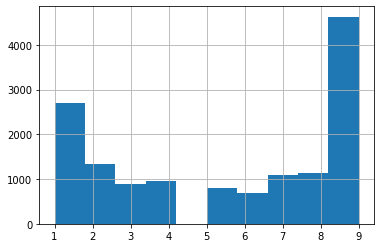

In [120]:
res['size'].hist()

In [129]:
# страны origin, по которым есть не менее 9 наблюдений, т.е данные за 9 лет

res[res['size'] > 8]['iso3_o'].unique()

array(['ALB', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BEL', 'BGR', 'BHR',
       'BHS', 'BIH', 'BLR', 'BOL', 'BRA', 'BRB', 'BWA', 'CAN', 'CHE',
       'CHL', 'CHN', 'CIV', 'CMR', 'COL', 'CYP', 'CZE', 'DEU', 'DNK',
       'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'FJI',
       'FRA', 'GBR', 'GEO', 'GRC', 'GRL', 'GTM', 'GUY', 'HKG', 'HRV',
       'HUN', 'IND', 'IRL', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN',
       'KAZ', 'KHM', 'KOR', 'LKA', 'LUX', 'LVA', 'MAR', 'MDA', 'MDG',
       'MEX', 'MKD', 'MLT', 'MUS', 'MWI', 'MYS', 'NIC', 'NLD', 'NOR',
       'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY',
       'RUS', 'SAU', 'SEN', 'SGP', 'SLV', 'SVK', 'SVN', 'SWE', 'THA',
       'TUN', 'TUR', 'TZA', 'UGA', 'UKR', 'URY', 'USA', 'VNM', 'ZAF',
       'ZMB', 'ZWE'], dtype=object)

In [130]:
# страны destination, по которым есть не менее 9 наблюдений, т.е данные за 9 лет

res[res['size'] > 8]['iso3_d'].unique()

array(['AUT', 'ITA', 'ALB', 'ARE', 'AUS', 'AZE', 'BEL', 'BHR', 'BOL',
       'BRA', 'BRB', 'CAN', 'CHE', 'CHL', 'CHN', 'COL', 'CRI', 'DEU',
       'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'FIN', 'FRA', 'GBR',
       'GEO', 'GTM', 'HKG', 'HUN', 'IDN', 'IND', 'ISR', 'JOR', 'JPN',
       'KOR', 'LBN', 'LKA', 'LVA', 'MAR', 'MEX', 'MRT', 'MUS', 'MYS',
       'NGA', 'NIC', 'NLD', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL',
       'POL', 'PRT', 'PRY', 'RUS', 'SAU', 'SEN', 'SGP', 'SLV', 'THA',
       'TTO', 'TUN', 'TUR', 'URY', 'USA', 'VNM', 'YEM', 'ZAF', 'ZMB',
       'BLR', 'KAZ', 'MDA', 'UKR', 'ARG', 'ARM', 'BGR', 'BIH', 'BRN',
       'CIV', 'CYP', 'CZE', 'EST', 'FJI', 'GRC', 'HRV', 'IRL', 'ISL',
       'KHM', 'KIR', 'MDG', 'MDV', 'MKD', 'MLT', 'NOR', 'SLB', 'SVK',
       'SVN', 'SWE', 'SWZ', 'TZA', 'WSM', 'ZWE', 'BLZ', 'ETH', 'JAM',
       'KGZ', 'LUX', 'TGO', 'UGA', 'BDI', 'BEN', 'BFA', 'BHS', 'BWA',
       'CAF', 'CMR', 'COG', 'COM', 'CPV', 'GHA', 'GMB', 'GUY', 'MOZ',
       'MWI', 'NAM',

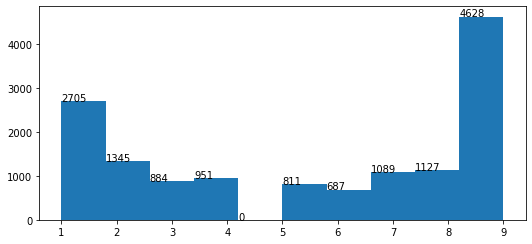

In [126]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

data = res['size']
counts, _, patches = plt.hist(data, align="mid")

for count, patch in zip(counts,patches):
    plt.annotate(str(int(count)), xy=(patch.get_x(), patch.get_height()))
plt.show()



In [131]:
final_ms_hhi_not_null

,year,iso3_o,iso3_d,contig,dist,comlang_off,comrelig,gdp_o,gdp_d,gatt_o,...,rta,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,trade_flows,Trade Value (US$),Market_Share,HHI_value,coeff_with_MS_HHI
7,2007,ALB,AUT,0.0,812.933,0.0,0.001,1.070101e+07,3.864391e+08,0.0,...,1.0,1.0,5.0,8,40,38.736,4.404947e+09,8.793750e-09,0.34,1.195950e-08
8,2007,ALB,BOL,0.0,11056.115,0.0,0.000,1.070101e+07,1.312018e+07,0.0,...,0.0,0.0,6.0,8,68,6.241,7.061196e+07,8.838446e-08,0.34,1.202029e-07
9,2007,ALB,CRI,0.0,10418.607,0.0,0.000,1.070101e+07,2.632200e+07,0.0,...,0.0,0.0,6.0,8,188,22.073,4.378374e+08,5.041369e-08,0.34,6.856262e-08
10,2007,ALB,DOM,0.0,8638.148,0.0,0.000,1.070101e+07,4.407828e+07,0.0,...,0.0,0.0,6.0,8,214,7.565,2.762214e+08,2.738745e-08,0.34,3.724693e-08
11,2007,ALB,DEU,0.0,1493.096,0.0,0.000,1.070101e+07,3.435507e+09,0.0,...,1.0,1.0,5.0,8,276,1.000,3.872978e+10,2.581993e-11,0.34,3.511510e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100418,2015,ZMB,NLD,0.0,7877.135,0.0,0.247,2.115439e+07,7.503181e+08,1.0,...,0.0,0.0,6.0,894,528,1.117,1.443222e+10,7.739629e-11,0.16,4.953363e-11
100419,2015,ZMB,NGA,0.0,3664.235,1.0,0.083,2.115439e+07,4.810662e+08,1.0,...,0.0,0.0,6.0,894,566,2.917,4.282895e+08,6.810814e-09,0.16,4.358921e-09
100421,2015,ZMB,VCT,0.0,10353.199,1.0,0.181,2.115439e+07,7.376836e+05,1.0,...,0.0,0.0,6.0,894,670,0.136,4.311108e+06,3.154641e-08,0.16,2.018971e-08
100422,2015,ZMB,ZAF,0.0,2278.582,1.0,0.152,2.115439e+07,3.174066e+08,1.0,...,1.0,1.0,4.0,894,710,49.001,2.172760e+09,2.255242e-08,0.16,1.443355e-08


In [137]:
final_ms_hhi_not_null.groupby(['iso3_o', 'iso3_d'], as_index=False)['trade_flows'].sum().sort_values(by='trade_flows', ascending=False)

,iso3_o,iso3_d,trade_flows
6722,IRL,USA,8.976335e+07
3580,DEU,BEL,8.823571e+07
3729,DEU,USA,8.238802e+07
13554,USA,DEU,6.816236e+07
6583,IRL,BEL,6.805513e+07
...,...,...,...
7013,ISR,MDV,1.000000e-03
2864,CIV,ARE,1.000000e-03
12848,TON,GBR,1.000000e-03
5748,GUY,NAM,1.000000e-03


In [136]:
import pandas as pd
pd.options.display.float_format = '{:.f}'.format

NameError: name 'num' is not defined